<a href="https://colab.research.google.com/github/maknoonisar/temppredictionof-koreandata/blob/main/98_acc_temp_data_online_dataset_of_korea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
# Importing the data set
df = pd.read_csv('/content/temp.csv')

In [ ]:
pd.set_option('display.max_row',25)
pd.set_option('display.max_column',25)
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [ ]:
df.dtypes.value_counts()


float64    24
object      1
Name: count, dtype: int64

In [ ]:
df.shape

(7752, 25)

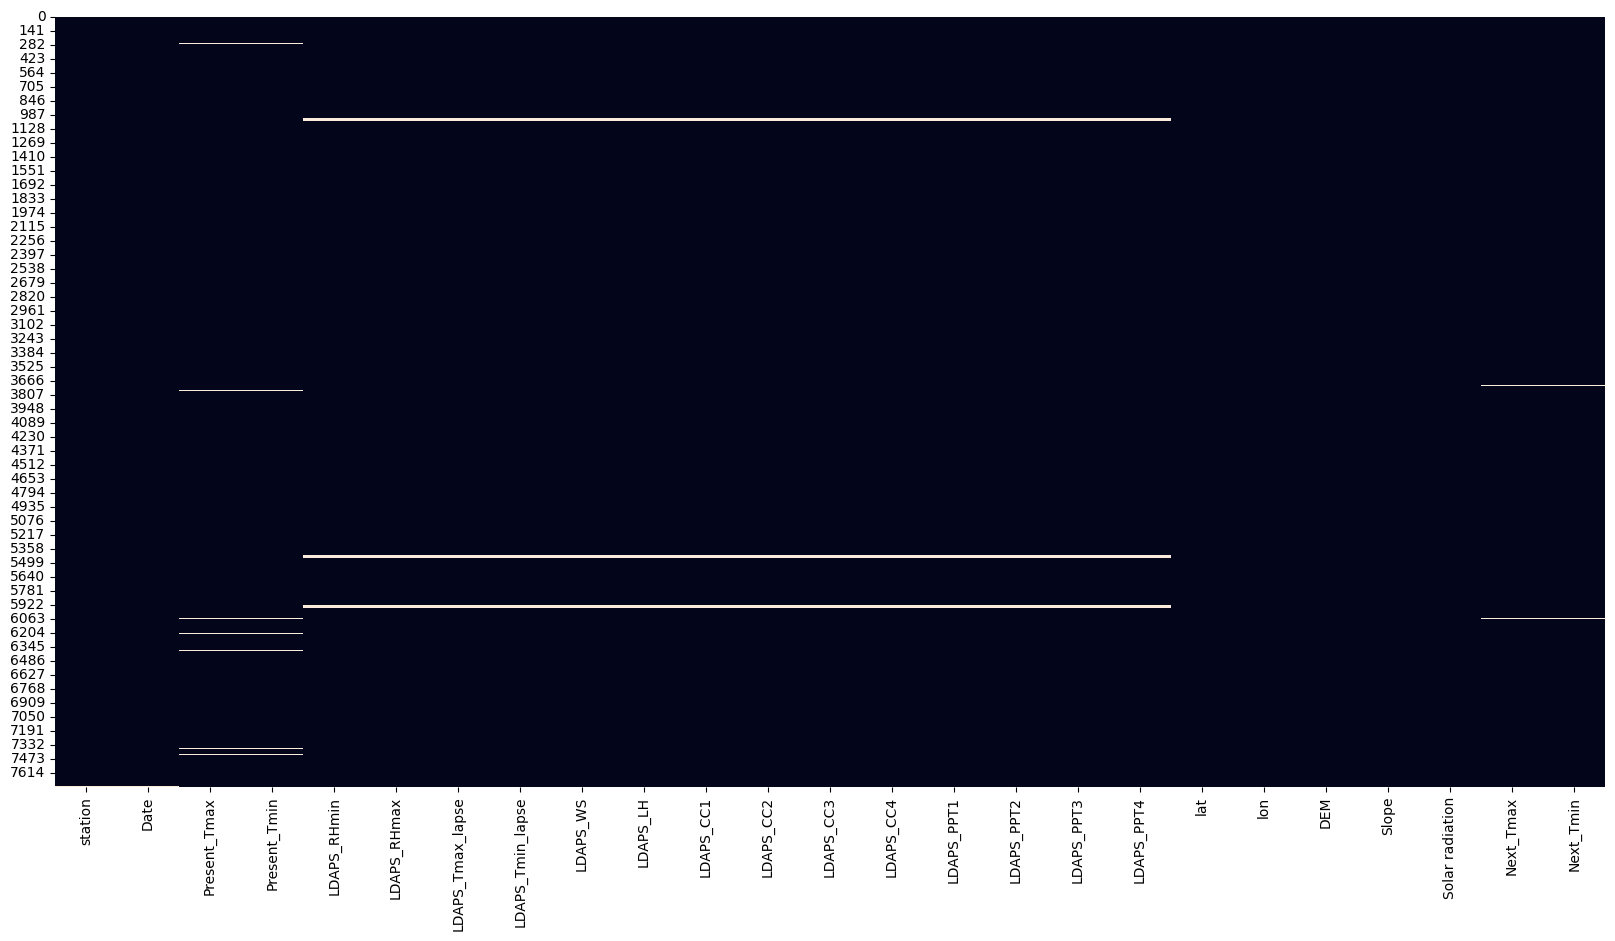

LDAPS_CC3           0.967492
LDAPS_PPT4          0.967492
LDAPS_PPT2          0.967492
LDAPS_PPT1          0.967492
LDAPS_CC4           0.967492
LDAPS_CC2           0.967492
LDAPS_CC1           0.967492
LDAPS_LH            0.967492
LDAPS_WS            0.967492
LDAPS_Tmin_lapse    0.967492
LDAPS_Tmax_lapse    0.967492
LDAPS_RHmax         0.967492
LDAPS_RHmin         0.967492
LDAPS_PPT3          0.967492
Present_Tmin        0.902993
Present_Tmax        0.902993
Next_Tmax           0.348297
Next_Tmin           0.348297
Date                0.025800
station             0.025800
lat                 0.000000
lon                 0.000000
DEM                 0.000000
Slope               0.000000
Solar radiation     0.000000
dtype: float64


In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)
plt.show()
print((df.isna().sum()/df.shape[0]*100).sort_values(ascending=False))

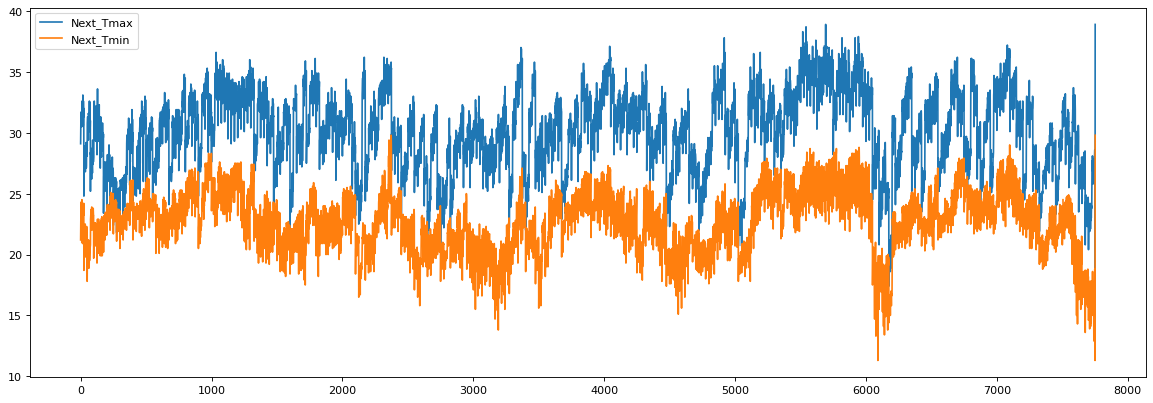

In [ ]:
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(df["Next_Tmax"],label="Next_Tmax")
plt.plot(df["Next_Tmin"],label="Next_Tmin")
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

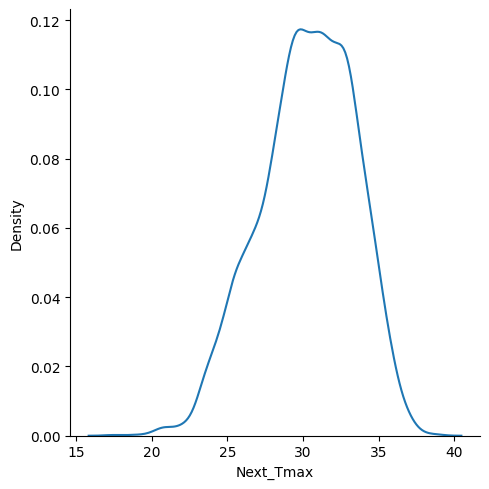

<Figure size 640x480 with 0 Axes>

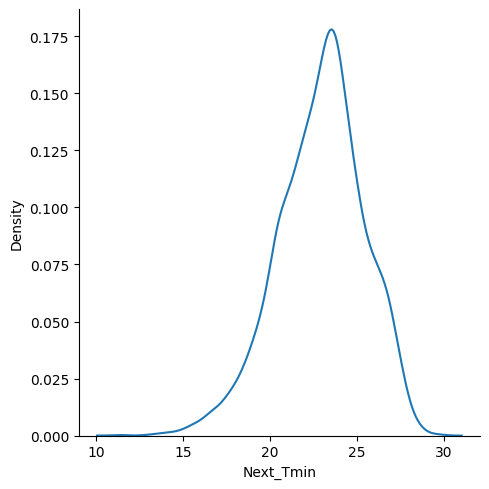

30.274886731391586
3.128010057855771
22.93222006472492
2.487612771331046


In [ ]:
for col in ["Next_Tmax","Next_Tmin"]:
    plt.figure()
    sns.displot(df[col],kind='kde')
    plt.show()
print(df["Next_Tmax"].mean())
print(df["Next_Tmax"].std())
print(df["Next_Tmin"].mean())
print(df["Next_Tmin"].std())

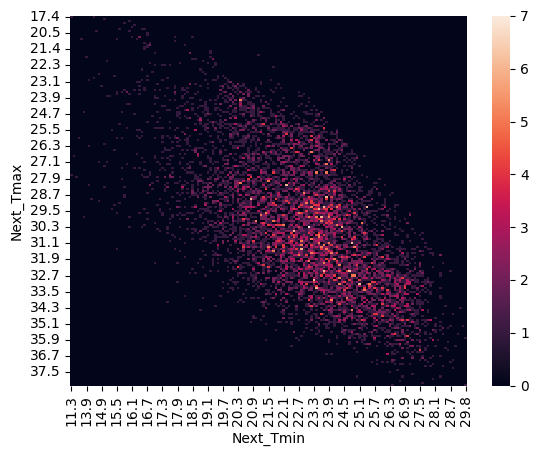

In [ ]:
plt.figure()
sns.heatmap(pd.crosstab(df['Next_Tmax'],df['Next_Tmin']))
plt.show()

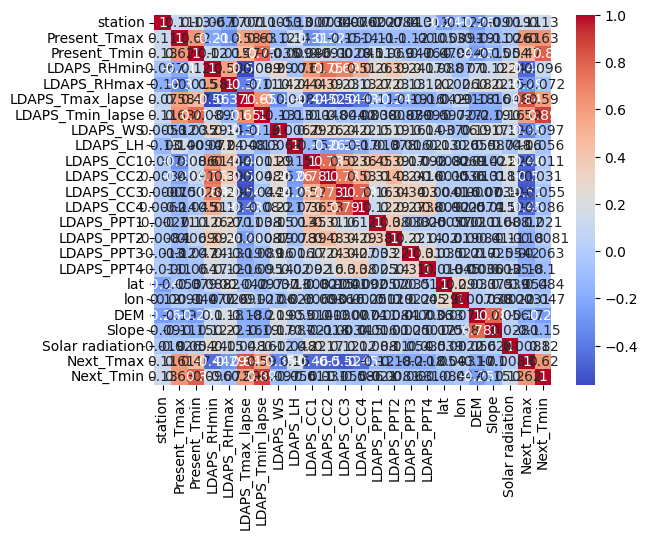

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Drop non-numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# Importing the data set
df = pd.read_csv('/content/temp.csv')
Save = df.copy()

In [ ]:
def feature_engineering(df):
    df = df.drop(["Date"],axis=1)
    print(df.dtypes.value_counts()) # Compte les nombre de types de variables
    return(df)

In [ ]:
def imputation(df):
    #df = df.fillna(-999)
    df = df.dropna(axis=0)
    return df

In [ ]:
def encodage(df):
    return df

In [ ]:
def preprocessing(df):
    df = imputation(df)
    df = encodage(df)
    df = feature_engineering(df)

    X = df.drop(['Next_Tmax','Next_Tmin'],axis=1)
    y_max = df["Next_Tmax"]
    y_min = df["Next_Tmin"]

    print(X.shape)
    print(y_max.shape)

    return X,y_max,y_min

In [ ]:
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [ ]:
X_train, y_min_train, y_max_train = preprocessing(trainset)
X_test, y_min_test, y_max_test = preprocessing(testset)

float64    24
Name: count, dtype: int64
(6068, 22)
(6068,)
float64    24
Name: count, dtype: int64
(1520, 22)
(1520,)


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_validate

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_validate

# Define the models with the correct loss parameter
reg_max = make_pipeline(StandardScaler(),
                        SGDRegressor(loss='squared_error', penalty='l2', max_iter=1000, tol=1e-3))
reg_max.fit(X_train, y_max_train)

reg_min = make_pipeline(StandardScaler(),
                        SGDRegressor(loss='squared_error', penalty='l2', max_iter=1000, tol=1e-3))
reg_min.fit(X_train, y_min_train)

# Perform cross-validation
cv_results_min = cross_validate(reg_min, X_train, y_min_train, cv=5, scoring=('r2', 'neg_root_mean_squared_error'), return_train_score=True)
cv_results_max = cross_validate(reg_max, X_train, y_max_train, cv=5, scoring=('r2', 'neg_root_mean_squared_error'), return_train_score=True)

# Print results
print('For Next_Tmin:')
print('Test RMSE :' , -cv_results_min['test_neg_root_mean_squared_error'].mean())
print('Test r2 :' , cv_results_min['test_r2'].mean())
print("Train RMSE :" , -cv_results_min['train_neg_root_mean_squared_error'].mean())
print("Train r2 :" , cv_results_min['train_r2'].mean())
print("*------------------------------------------*")
print('For Next_Tmax:')
print('Test RMSE :' , -cv_results_max['test_neg_root_mean_squared_error'].mean())
print('Test r2 :' , cv_results_max['test_r2'].mean())
print("Train RMSE :" , -cv_results_max['train_neg_root_mean_squared_error'].mean())
print("Train r2 :" , cv_results_max['train_r2'].mean())



For Next_Tmin:
Test RMSE : 1.4702651102213091
Test r2 : 0.7757092996406588
Train RMSE : 1.4663936289158623
Train r2 : 0.7771600403378942
*------------------------------------------*
For Next_Tmax:
Test RMSE : 1.0111711680492275
Test r2 : 0.8331986968249373
Train RMSE : 1.006045384125938
Train r2 : 0.8354162187575597


In [ ]:
Next_Tmin_predict = reg_min.predict(X_test)
Next_Tmax_predict = reg_max.predict(X_test)

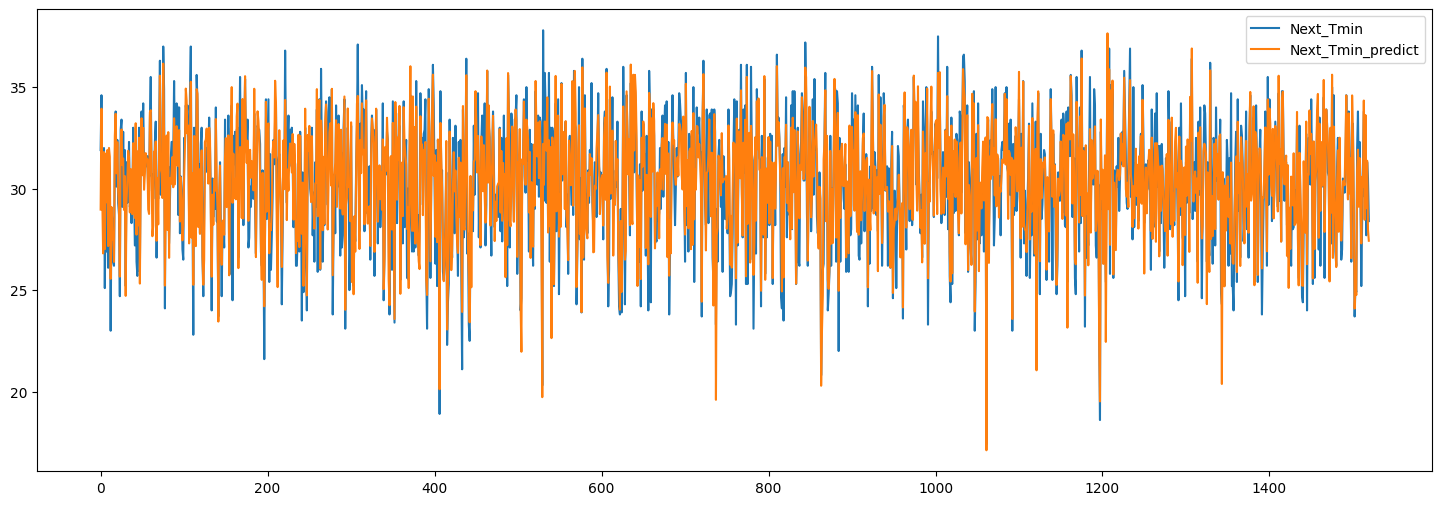

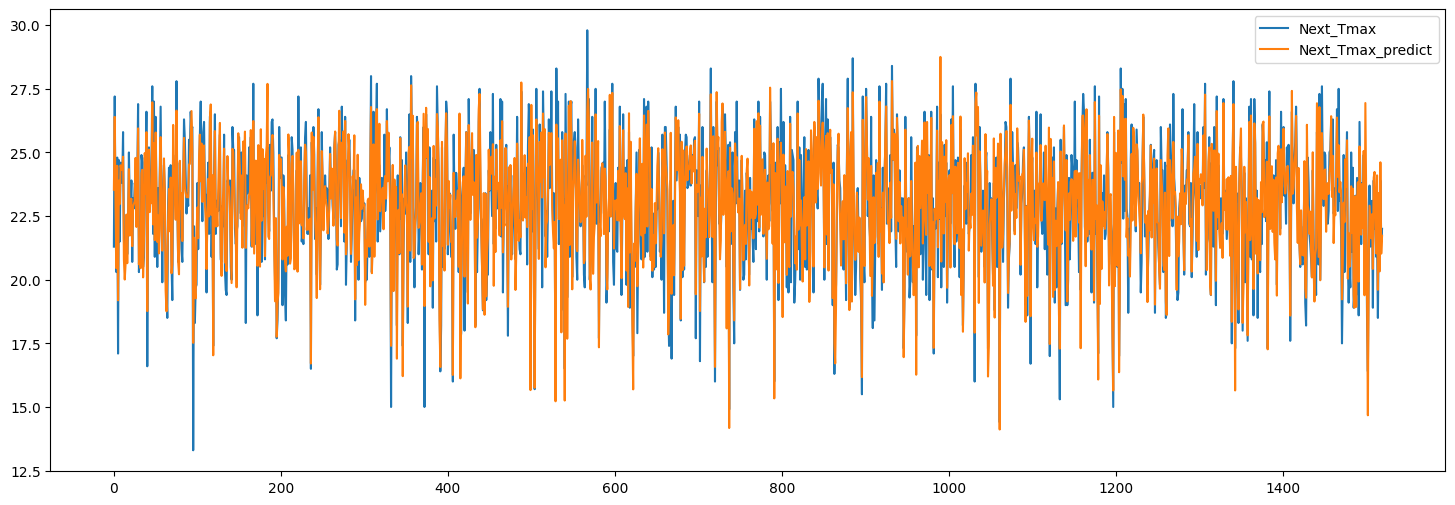

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(y_min_test.to_numpy(),label="Next_Tmin")
plt.plot(Next_Tmin_predict,label="Next_Tmin_predict")
plt.legend()
plt.show()

plt.figure(figsize=(18,6))
plt.plot(y_max_test.to_numpy(),label="Next_Tmax")
plt.plot(Next_Tmax_predict,label="Next_Tmax_predict")
plt.legend()
plt.show()

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')


Streaming output truncated to the last 5000 lines.
<ipython-input-26-7e1debb537b2>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'{column}_lag_{lag}'] = data[column].shift(lag)
<ipython-input-26-7e1debb537b2>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'{column}_lag_{lag}'] = data[column].shift(lag)
<ipython-input-26-7e1debb537b2>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns

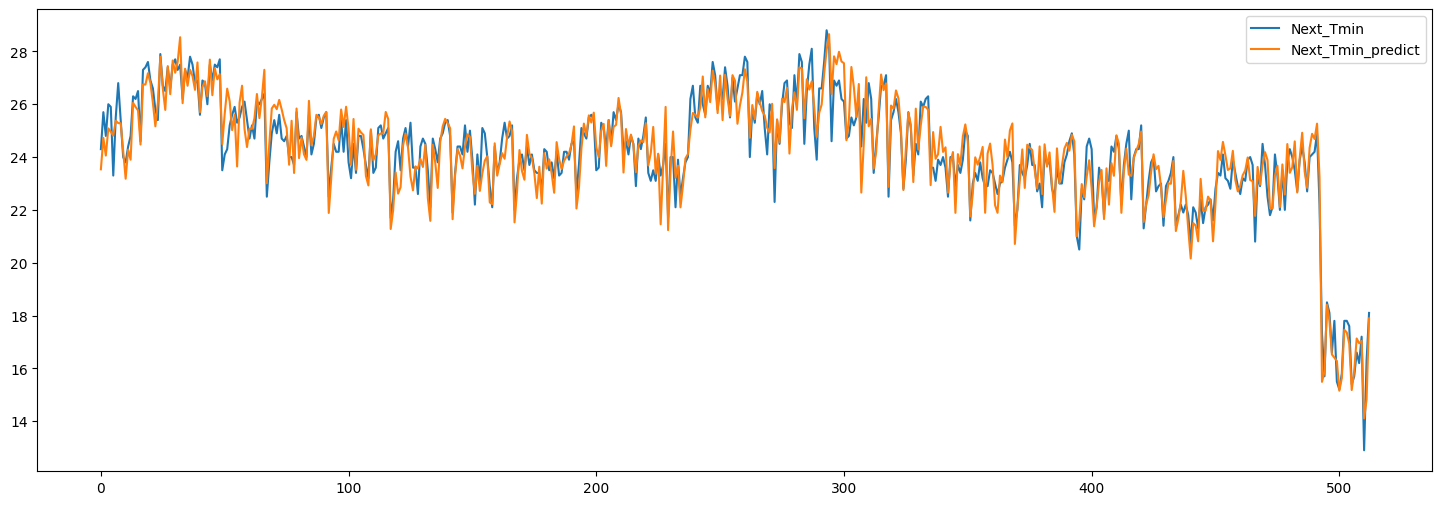

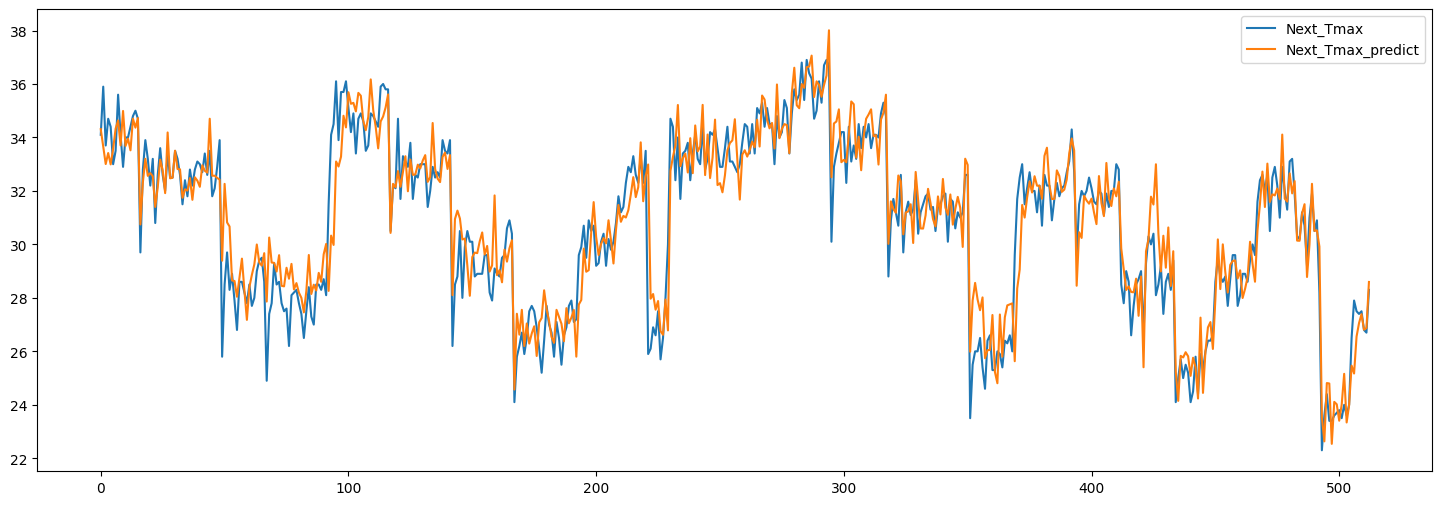

Results saved to temperature_predictions.xlsx


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data from a CSV file (update the file path as needed)
data = pd.read_csv('/content/temp.csv')

# Print the column names to verify the structure
print(data.columns)

# Ensure the Date column is a datetime type
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Set the Date column as the index
data.set_index('Date', inplace=True)

# Create lag features for every 3 hours
for lag in range(3, 25, 3):
    for column in data.columns:
        data[f'{column}_lag_{lag}'] = data[column].shift(lag)

# Drop rows with missing values created by lagging
data.dropna(inplace=True)

# Split into features (X) and target (y)
X = data.drop(['Next_Tmax', 'Next_Tmin'], axis=1)  # Drop current day's features and keep target columns
y = data[['Next_Tmax', 'Next_Tmin']]  # Keep target columns

# Split the data into training and testing sets with a test size of 0.1 (10%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Extracting actual and predicted values for Tmin and Tmax
y_min_test = y_test['Next_Tmin']
y_max_test = y_test['Next_Tmax']
Next_Tmin_predict = y_pred[:, 1]  # Assuming the second column corresponds to Next_Tmin
Next_Tmax_predict = y_pred[:, 0]  # Assuming the first column corresponds to Next_Tmax

# Plotting for visualization
plt.figure(figsize=(18, 6))
plt.plot(y_min_test.to_numpy(), label="Next_Tmin")
plt.plot(Next_Tmin_predict, label="Next_Tmin_predict")
plt.legend()
plt.show()

plt.figure(figsize=(18, 6))
plt.plot(y_max_test.to_numpy(), label="Next_Tmax")
plt.plot(Next_Tmax_predict, label="Next_Tmax_predict")
plt.legend()
plt.show()

# Combine the actual and predicted values into a DataFrame
results_df = pd.DataFrame({
    'Index': range(len(y_min_test)),
    'Next_Tmin': y_min_test.to_numpy(),
    'Next_Tmin_predict': Next_Tmin_predict,
    'Next_Tmax': y_max_test.to_numpy(),
    'Next_Tmax_predict': Next_Tmax_predict
})

# Save to Excel
results_df.to_excel('/content/temperature_predictions.xlsx', index=False)

print("Results saved to temperature_predictions.xlsx")




Streaming output truncated to the last 5000 lines.
<ipython-input-27-271e3ebaf769>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'{column}_lag_{lag}'] = data[column].shift(lag)
<ipython-input-27-271e3ebaf769>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'{column}_lag_{lag}'] = data[column].shift(lag)
<ipython-input-27-271e3ebaf769>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns

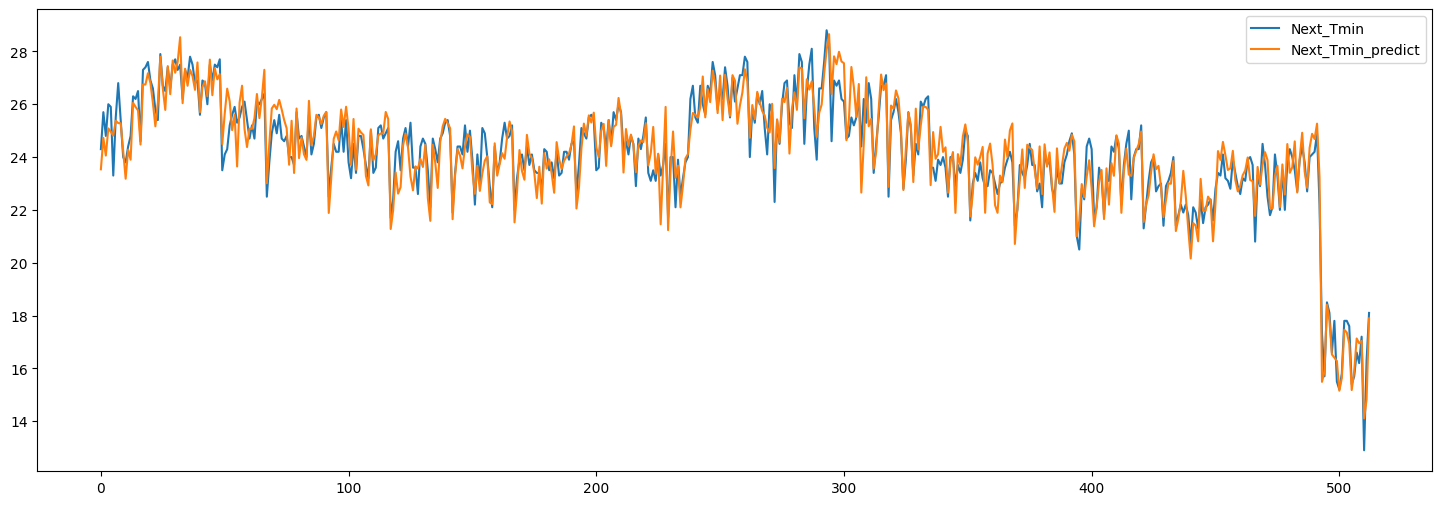

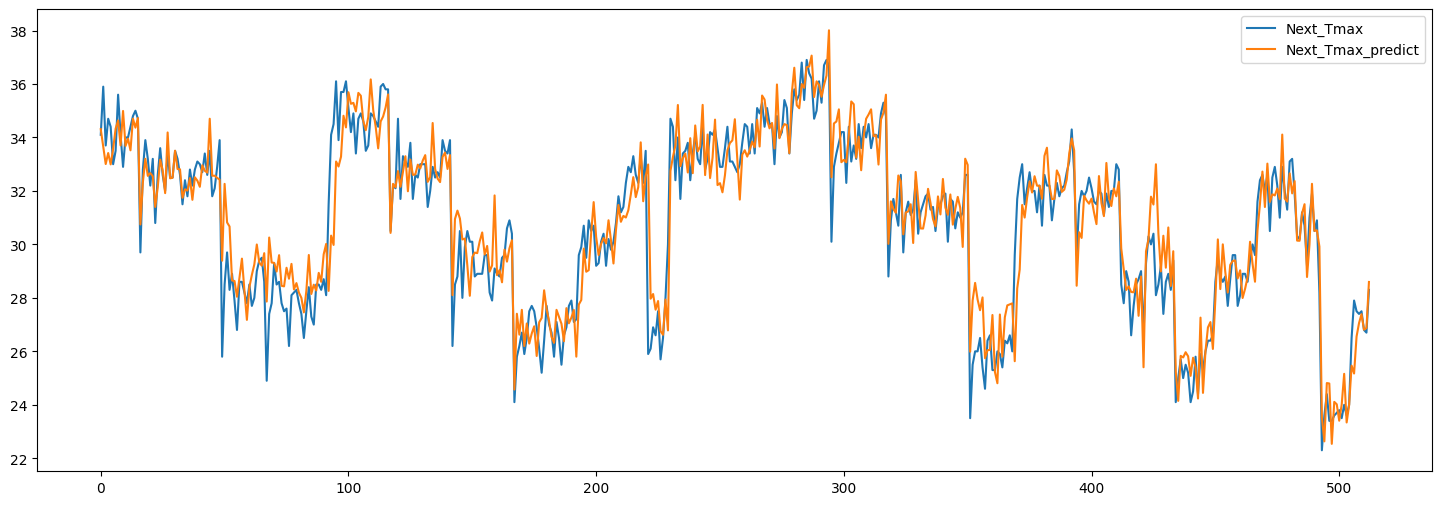

Tmin - MAE: 0.5178071259987518, MSE: 0.4478579716239927, R²: 0.9047761048000581
Tmax - MAE: 0.8344908217937627, MSE: 1.3075403091474562, R²: 0.8705017325849974
Results saved to temperature_predictions1.xlsx


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data from a CSV file (update the file path as needed)
data = pd.read_csv('/content/temp.csv')

# Ensure the Date column is a datetime type
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Set the Date column as the index
data.set_index('Date', inplace=True)

# Create lag features for every 3 hours
for lag in range(3, 25, 3):
    for column in data.columns:
        data[f'{column}_lag_{lag}'] = data[column].shift(lag)

# Drop rows with missing values created by lagging
data.dropna(inplace=True)

# Split into features (X) and target (y)
X = data.drop(['Next_Tmax', 'Next_Tmin'], axis=1)  # Drop current day's features and keep target columns
y = data[['Next_Tmax', 'Next_Tmin']]  # Keep target columns

# Split the data into training and testing sets with a test size of 0.1 (10%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Extracting actual and predicted values for Tmin and Tmax
y_min_test = y_test['Next_Tmin']
y_max_test = y_test['Next_Tmax']
Next_Tmin_predict = y_pred[:, 1]  # Assuming the second column corresponds to Next_Tmin
Next_Tmax_predict = y_pred[:, 0]  # Assuming the first column corresponds to Next_Tmax

# Plotting for visualization
plt.figure(figsize=(18, 6))
plt.plot(y_min_test.to_numpy(), label="Next_Tmin")
plt.plot(Next_Tmin_predict, label="Next_Tmin_predict")
plt.legend()
plt.show()

plt.figure(figsize=(18, 6))
plt.plot(y_max_test.to_numpy(), label="Next_Tmax")
plt.plot(Next_Tmax_predict, label="Next_Tmax_predict")
plt.legend()
plt.show()

# Combine the actual and predicted values into a DataFrame
results_df = pd.DataFrame({
    'Index': range(len(y_min_test)),
    'Next_Tmin': y_min_test.to_numpy(),
    'Next_Tmin_predict': Next_Tmin_predict,
    'Next_Tmax': y_max_test.to_numpy(),
    'Next_Tmax_predict': Next_Tmax_predict
})

# Calculate performance metrics for Tmin
mae_tmin = mean_absolute_error(y_min_test, Next_Tmin_predict)
mse_tmin = mean_squared_error(y_min_test, Next_Tmin_predict)
r2_tmin = r2_score(y_min_test, Next_Tmin_predict)

print(f"Tmin - MAE: {mae_tmin}, MSE: {mse_tmin}, R²: {r2_tmin}")

# Calculate performance metrics for Tmax
mae_tmax = mean_absolute_error(y_max_test, Next_Tmax_predict)
mse_tmax = mean_squared_error(y_max_test, Next_Tmax_predict)
r2_tmax = r2_score(y_max_test, Next_Tmax_predict)

print(f"Tmax - MAE: {mae_tmax}, MSE: {mse_tmax}, R²: {r2_tmax}")

# Save to Excel
results_df.to_excel('/content/temperature_predictions1.xlsx', index=False)

print("Results saved to temperature_predictions1.xlsx")
